In [84]:
import math
import pandas as pd 

class Calculation:

    def __init__(self, loan_interest: float, loan_amount: float, ln_tenure: float, fv_interest_rate: float, every_rm= 100, until_rm=1000, fv_n=12, ln_n=12):
        self.loan_interest = loan_interest
        self.loan_amount = loan_amount
        self.ln_n = ln_n
        self.ln_tenure = ln_tenure
        self.fv_interest_rate = fv_interest_rate
        self.fv_n = fv_n
        self.every_rm = every_rm
        self.until_rm = until_rm

    def loan_tenure(self, repayment:float):
        an_int = self.loan_interest/self.ln_n
        n = (math.log(repayment/(repayment-self.loan_amount*an_int)))/(math.log(1+an_int))/self.ln_n
        return n
    
    def interest(self, ln_tenure:float):
        ttl_month = self.ln_n*ln_tenure
        repayment = ((self.loan_amount*(self.loan_interest/self.ln_n)*((1+(self.loan_interest/self.ln_n))**ttl_month))/(((1+(self.loan_interest/self.ln_n))**ttl_month)-1))
        ttl_interest = ((repayment*ttl_month) - self.loan_amount)
        loan_with_interest = repayment*ttl_month
        interest_info = {'repayment' : repayment,
                         'ttl_interest' : ttl_interest,
                         'loan_with_interest' : loan_with_interest}
        return interest_info
    
    def future_value(self, monthly_deposit:float, fv_tenure:float):
        ttl_month = fv_tenure*self.fv_n
        fv = monthly_deposit*(((1+self.fv_interest_rate/self.fv_n)**ttl_month)-1)/(self.fv_interest_rate/self.fv_n)
        return fv
    
    def compile(self):
        data, data2, data3, data4, data5 = [],[],[],[],[]
        ringgit = [x for x in range(0,self.until_rm,self.every_rm)]
        repayment = self.interest(self.ln_tenure)['repayment']
        repay_sc = [(repayment+x) for x in range(0,self.until_rm,self.every_rm)]
        for x in repay_sc:
            data2.append(self.loan_tenure(x))
        
        f = zip(ringgit, data2)

        for x,y in f:
            data.append(self.future_value(x, y))

        for x in data2:
            interest_info = self.interest(x)
            data3.append(interest_info['ttl_interest'])
            data4.append(interest_info['repayment'])
            data5.append(interest_info['loan_with_interest'])

        df = ({'investment value': data, 'loan principal': self.loan_amount
               , 'total interest': data3, 'tenure (year)' : data2
               ,'loan repayment' : data4, 'loan with interest' : data5})
        df = pd.DataFrame(df)
        df['interest deduction'] = df['total interest'][0] - df['total interest']
        df['value'] = df['investment value'] - df['interest deduction']
        df.index = [f'RM{x}' for x in range(0,self.until_rm,self.every_rm)]
        grf1 = df[['investment value', 'interest deduction']].plot(kind='bar', title=f'investment value vs loan interest saving on every RM{self.every_rm}')
        grf2 = df[['value']].plot(kind='bar', title=f'value on every RM{self.every_rm}')
        df = df.style.format("{:,.2f}")
        return grf1, grf2, df

    def __str__(self):
        repayments = self.interest(self.ln_tenure)
        return f"loan amount: {self.loan_amount} \nloan tenure: {self.ln_tenure} \nloan interest: {self.loan_interest} \nloan monthly repayment: {repayments['repayment']:_.2f} "

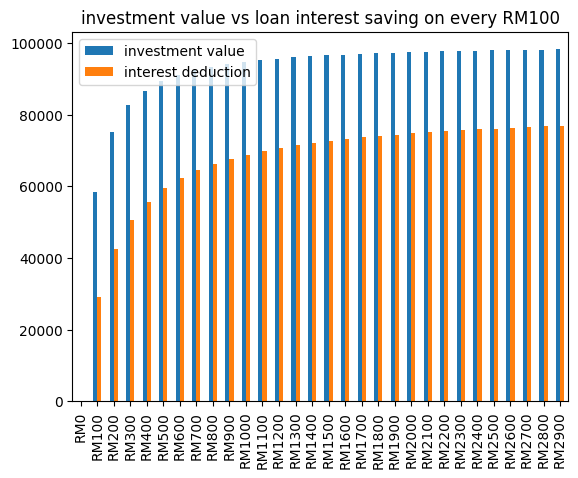

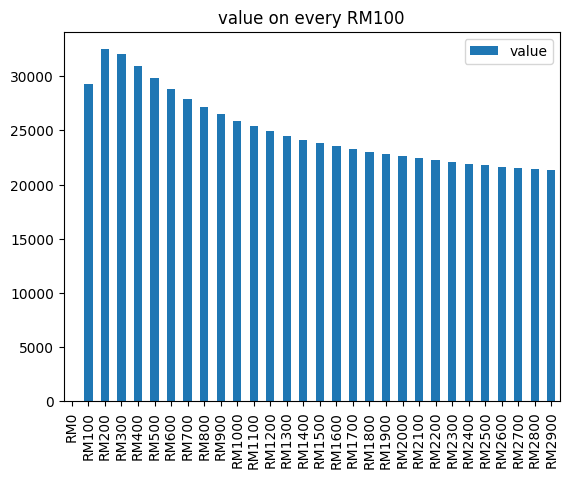

In [85]:
calc = Calculation(loan_interest=0.0385,loan_amount=100000, ln_tenure=35, fv_interest_rate=0.054, every_rm = 100, until_rm = 3000)
grf1, grf2, df = calc.compile()

In [86]:
print(calc)

loan amount: 100000 
loan tenure: 35 
loan interest: 0.0385 
loan monthly repayment: 433.82 


In [87]:
df

,investment value,loan principal,total interest,tenure (year),loan repayment,loan with interest,interest deduction,value
RM0,0.00,"100,000.00","82,205.48",35.00,433.82,"182,205.48",0.00,0.00
RM100,"58,337.64","100,000.00","53,124.44",23.90,533.82,"153,124.44","29,081.04","29,256.60"
RM200,"75,050.75","100,000.00","39,618.41",18.36,633.82,"139,618.41","42,587.07","32,463.67"
RM300,"82,559.54","100,000.00","31,691.77",14.95,733.82,"131,691.77","50,513.71","32,045.83"
RM400,"86,724.07","100,000.00","26,449.41",12.64,833.82,"126,449.41","55,756.07","30,968.00"
RM500,"89,337.68","100,000.00","22,715.63",10.95,933.82,"122,715.63","59,489.86","29,847.82"
RM600,"91,117.10","100,000.00","19,917.35",9.67,"1,033.82","119,917.35","62,288.13","28,828.97"
RM700,"92,400.53","100,000.00","17,740.42",8.65,"1,133.82","117,740.42","64,465.07","27,935.46"
RM800,"93,366.85","100,000.00","15,997.71",7.83,"1,233.82","115,997.71","66,207.77","27,159.07"
RM900,"94,118.96","100,000.00","14,570.64",7.16,"1,333.82","114,570.64","67,634.85","26,484.12"


In [61]:
print(f'{calc.future_value(monthly_deposit=100,fv_tenure=10):,.2f}')

15,865.10


In [47]:
calc.interest(15)

{'repayment': 732.1935977646245,
 'ttl_interest': 31794.84759763241,
 'loan_with_interest': 131794.8475976324}